In [1]:
import cv2
import dlib
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from os import listdir
import shutil

In [2]:
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bzip2 -d mmod_human_face_detector.dat.bz2

--2022-04-17 16:26:04--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  --.-KB/s    in 0.1s    

2022-04-17 16:26:04 (5.27 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp "/content/drive/MyDrive/Proiect-IAVA/pozele_noastre.zip" "/content"
!unzip pozele_noastre.zip
!rm pozele_noastre.zip

Archive:  pozele_noastre.zip
  inflating: pozele_noastre/ali-morshedlou-WMD64tMfc4k-unsplash.jpg  
  inflating: pozele_noastre/antonino-visalli-RNiBLy7aHck-unsplash.jpg  
  inflating: pozele_noastre/ayo-ogunseinde-6W4F62sN_yI-unsplash.jpg  
  inflating: pozele_noastre/ben-parker-OhKElOkQ3RE-unsplash.jpg  
  inflating: pozele_noastre/christina-wocintechchat-com-0Zx1bDv5BNY-unsplash.jpg  
  inflating: pozele_noastre/elevate-nYgy58eb9aw-unsplash.jpg  
  inflating: pozele_noastre/ian-dooley-d1UPkiFd04A-unsplash.jpg  
  inflating: pozele_noastre/icons8-team-FcLyt7lW5wg-unsplash.jpg  
  inflating: pozele_noastre/joel-muniz-0QuIgOjLLXc-unsplash.jpg  
  inflating: pozele_noastre/joel-muniz-KodMXENNaas-unsplash.jpg  
  inflating: pozele_noastre/joseph-gonzalez-iFgRcqHznqg-unsplash.jpg  
  inflating: pozele_noastre/kadyn-pierce-L203i9Xi_XE-unsplash.jpg  
  inflating: pozele_noastre/kadyn-pierce-oX9TTndhoTY-unsplash.jpg  
  inflating: pozele_noastre/matheus-ferrero-W7b3eDUb_2I-unsplash.jpg  
  in

In [10]:
folder_name = 'pozele_noastre/'
image_names = listdir(folder_name)
faces = {}
face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
nr_faces = 0

for image_name in image_names:
  image = io.imread(folder_name + image_name)
  if image.ndim == 2:
      image = color.gray2rgb(image)
  elif image.shape[-1] == 4:
      image = image[..., :3]

  detected_faces = face_detector(cv2.cvtColor(image[..., ::-1].copy(), cv2.COLOR_BGR2GRAY))
  detected_faces = [[d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()] for d in detected_faces]
  nr_faces += len(detected_faces)
  faces[image_name] = (image, detected_faces)

In [11]:
nr_faces

50

In [12]:
def add_margin(img, corners, ratio = 0.4):
  W, H, _ = img.shape
  x1, y1, x2, y2 = corners

  w = x2 - x1
  h = y2 - y1

  delta_x = int(ratio*w)
  delta_y = int(ratio*h)

  new_x1 = max(x1 - delta_x, 0)
  new_x2 = min(x2 + delta_x, H)
  new_y1 = max(y1 - delta_y, 0)
  new_y2 = min(y2 + delta_y, W)

  return [new_x1, new_y1, new_x2, new_y2]

def crop(img, corners):
  x1, y1, x2, y2 = corners
  new_img = img[y1:y2, x1:x2]
  return new_img

In [13]:
!mkdir 'faces_dil'

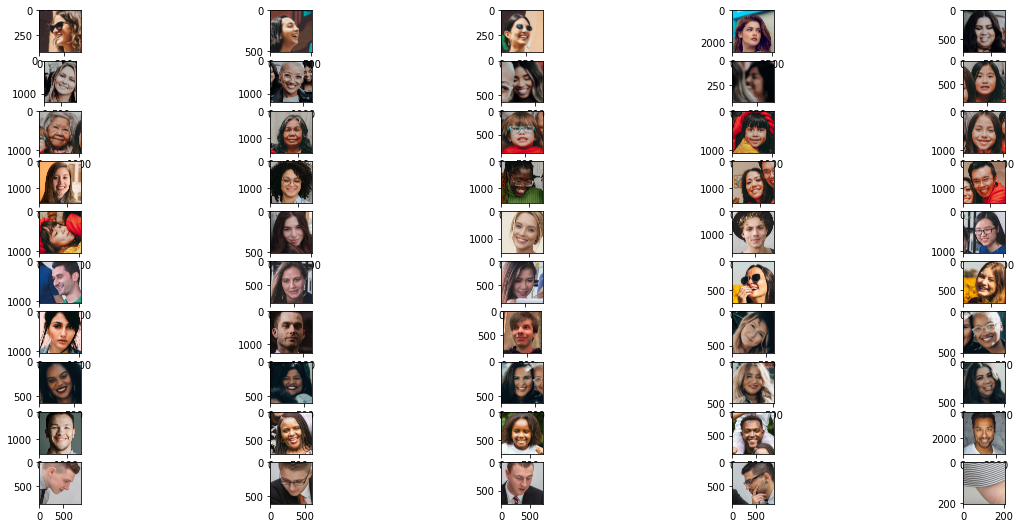

In [14]:
plt.figure(figsize=(20, 10))
columns = 5
i = 0

for image, face_corners in faces.values():
  for corners in face_corners:
    new_corners = add_margin(image, corners)
    #print(f'{corners} {new_corners}')

    new_img = crop(image, new_corners)

    plt.subplot(nr_faces / columns + 1, columns, i + 1)
    plt.imshow(new_img)

    io.imsave("cropped_image.png", new_img)
    shutil.move("cropped_image.png", f"faces_dil/img{i+1}.png")

    i += 1

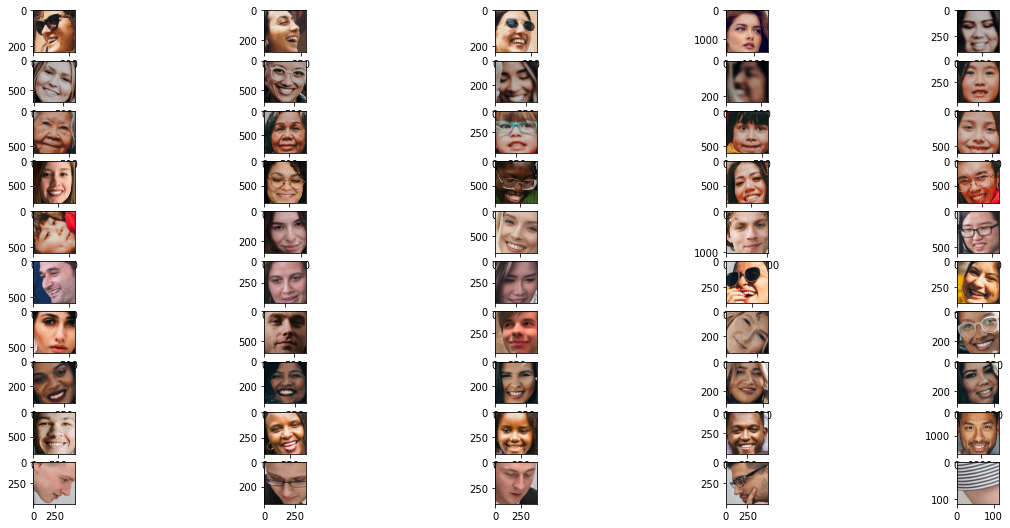

In [15]:
plt.figure(figsize=(20, 10))
columns = 5
i = 0

for image, face_corners in faces.values():
  for corners in face_corners:
    x1, y1, x2, y2 = corners
    x1, y1 = max(x1, 0), max(y1, 0) 
    new_img = crop(image, [x1, y1, x2, y2])

    plt.subplot(nr_faces / columns + 1, columns, i + 1)
    plt.imshow(new_img)

    i += 1

In [ ]:
!cp -r "faces_dil/" "/content/drive/MyDrive/Proiect-IAVA"

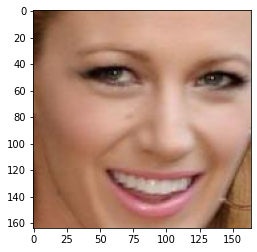

In [ ]:
plt.imshow(new_img)

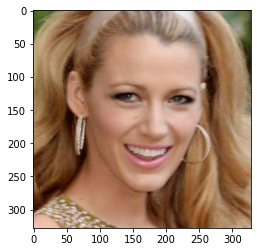

In [ ]:
corners = add_margin(image, detected_faces)
new_img = crop(image, corners)
plt.imshow(new_img)